In [ ]:
!pip install basedosdados

In [ ]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_inep_sinopse_estatistica_educacao_basica',
table_id='municipio_matricula_localizacao_rede',
billing_project_id="datanalysis-223569")

ModuleNotFoundError: ignored

In [ ]:
df.head()

,ano,sigla_uf,id_municipio,localizacao,rede,etapa_ensino,quantidade_matricula
0,2010,AL,2700102,urbana,federal,1,0
1,2010,AL,2700201,urbana,federal,1,0
2,2010,AL,2700300,urbana,federal,1,0
3,2010,AL,2700409,urbana,federal,1,0
4,2010,AL,2700508,urbana,federal,1,0


In [ ]:
df.shape

(4811400, 7)

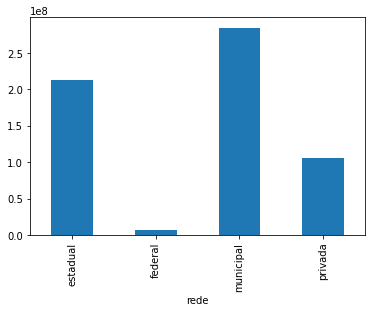

In [ ]:
test = df.groupby(['rede'])['quantidade_matricula'].sum().plot(kind='bar')
test

In [ ]:
df['etapa_ensino'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {'contract': [123,1234,12345],'pv': [10000,20000,30000], 'term': [12, 24, 30], 'rate': [1.09,2.3,1.05]}
df = pd.DataFrame(data)

In [ ]:
df = df.set_index("contract")
df['rate'] = df['rate']/100
df['principal']= df['pv'] / df['term']
df.head()

,pv,term,rate,principal
contract,,,,
123,10000,12,0.0109,833.333333
1234,20000,24,0.0230,833.333333
12345,30000,30,0.0105,1000.000000


In [ ]:
df = df.iloc[:1].copy()

In [ ]:
df['principal']= df['pv'] / df['term']

In [ ]:
df

,pv,term,rate,principal
contract,,,,
123,10000,12,0.0109,833.333333


In [ ]:
def get_pmt(pv, i, n, entrada):
    """Função para calcular a prestação"""
    if entrada:
        pmt = pv / (((1 + i)**n - 1) / ((1 + i)**(n-1) * i))
    else:
        pmt = pv / (((1 + i)**n - 1) / ((1 + i)**n * i))
    return pmt

In [ ]:
def amort_by_column(df, term, rate, principal, pv):

#descripiton: This function create the armotization of a loan
#through columns.

#df: Dataframe wih all loans
#term: columns that contains the term of loan
#rate columns that contains the rate of loan
#columns that contains the principal of loan
#columns that contains the present value of loan

  max_term = int(df[term].max())
  df['total_EA'] = 0
  for i in range(max_term+1):
    if i == 0: 
      df[f'EA_{i}'] = df[pv]
    else: 
      df[f'EA_{i}'] = round(df[f'EA_{i-1}'] - df[principal],2).where( i < df[term],0)
    df['total_EA'] = df['total_EA'] + df[f'EA_{i}']
 
  #revenue
  df['revenue'] = 0
  for j in range(max_term+1):
    df[f'revenue_{j}'] = round(df[f'EA_{j}'] * df[rate]).where(j < df[term],0)
    df['revenue'] = df['revenue'] + df[f'revenue_{j}']
  return df

In [ ]:
%time
df = amort_by_column(df,'term','rate','principal', 'pv')
df.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs


,pv,term,rate,principal,total_EA,EA_0,EA_1,EA_2,EA_3,EA_4,...,revenue_21,revenue_22,revenue_23,revenue_24,revenue_25,revenue_26,revenue_27,revenue_28,revenue_29,revenue_30
contract,,,,,,,,,,,,,,,,,,,,,
123,10000,12,0.0109,833.333333,65000.22,10000,9166.67,8333.34,7500.01,6666.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,20000,24,0.0230,833.333333,250000.92,20000,19166.67,18333.34,17500.01,16666.68,...,58.0,38.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12345,30000,30,0.0105,1000.000000,465000.00,30000,29000.00,28000.00,27000.00,26000.00,...,94.0,84.0,74.0,63.0,52.0,42.0,32.0,21.0,10.0,0.0


In [ ]:
test = df[['pv','term','rate','principal','EA_0','EA_1','EA_2','EA_3','EA_4','EA_5','EA_6','EA_7','EA_8','EA_9','EA_10','EA_11','EA_12','EA_13', 'total_EA', 'revenue']].copy()

In [ ]:
test

,pv,term,rate,principal,EA_0,EA_1,EA_2,EA_3,EA_4,EA_5,EA_6,EA_7,EA_8,EA_9,EA_10,EA_11,EA_12,EA_13,total_EA,revenue
contract,,,,,,,,,,,,,,,,,,,,
123,10000,12,0.0109,833.333333,10000,9166.67,8333.34,7500.01,6666.68,5833.35,5000.02,4166.69,3333.36,2500.03,1666.7,833.37,0.00,0.00,65000.22,709.0
1234,20000,24,0.0230,833.333333,20000,19166.67,18333.34,17500.01,16666.68,15833.35,15000.02,14166.69,13333.36,12500.03,11666.7,10833.37,10000.04,9166.71,250000.92,5752.0
12345,30000,30,0.0105,1000.000000,30000,29000.00,28000.00,27000.00,26000.00,25000.00,24000.00,23000.00,22000.00,21000.00,20000.0,19000.00,18000.00,17000.00,465000.00,4882.0


In [ ]:
df.T.to_csv("mtest.csv")